In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer=load_breast_cancer()
rng=np.random.RandomState(42)
noise=rng.normal(size=(len(cancer.data),50))

X_w_noise=np.hstack([cancer.data,noise])

X_train,X_test,y_train,y_test=train_test_split(X_w_noise,cancer.target,
                                              random_state=0,test_size=.5)
select=SelectPercentile(percentile=50)
select.fit(X_train,y_train)

X_train_selected=select.transform(X_train)

print('X_train.shape: {}'.format(X_train.shape))
print('X_train_selected.shape: {}'.format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


In [3]:
np.random.RandomState(1).normal(size=(10,10))

array([[ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
        -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038],
       [ 1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944,
        -1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521],
       [-1.10061918,  1.14472371,  0.90159072,  0.50249434,  0.90085595,
        -0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547],
       [-0.69166075, -0.39675353, -0.6871727 , -0.84520564, -0.67124613,
        -0.0126646 , -1.11731035,  0.2344157 ,  1.65980218,  0.74204416],
       [-0.19183555, -0.88762896, -0.74715829,  1.6924546 ,  0.05080775,
        -0.63699565,  0.19091548,  2.10025514,  0.12015895,  0.61720311],
       [ 0.30017032, -0.35224985, -1.1425182 , -0.34934272, -0.20889423,
         0.58662319,  0.83898341,  0.93110208,  0.28558733,  0.88514116],
       [-0.75439794,  1.25286816,  0.51292982, -0.29809284,  0.48851815,
        -0.07557171,  1.13162939,  1.51981682

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Sample index')

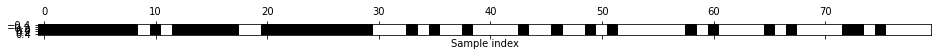

In [4]:
mask=select.get_support()
print(mask)

plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel('Sample index')

In [5]:
from sklearn.linear_model import LogisticRegression

X_test_selected=select.transform(X_test)

lr=LogisticRegression()
lr.fit(X_train,y_train)
print('Score with all features: {:.3f}'.format(lr.score(X_test,y_test)))
lr.fit(X_train_selected,y_train)
print('Score with only selected features: {:.3f}'.format(lr.score(X_test_selected,
                                                                 y_test)))

Score with all features: 0.916
Score with only selected features: 0.916


In [6]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select=SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=42),
                      threshold='median')

In [7]:
select.fit(X_train,y_train)
X_train_l1=select.transform(X_train)
print('X_train.shape: {}'.format(X_train.shape))
print('X_train_l1.shape: {}'.format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5, 0, 'Sample index')

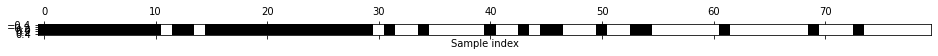

In [8]:
mask=select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel('Sample index')

In [9]:
X_test_l1=select.transform(X_test)
score=LogisticRegression().fit(X_train_l1,y_train).score(X_test_l1,y_test)
print('Test score: {:.3f}'.format(score))


Test score: 0.930
